# Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# para que los gráficos se vean más bonitos
sns.set(style="whitegrid")

print("Librerías importadas con éxito")

Librerías importadas con éxito


# Cargar los datos

In [2]:
file_path = 'listings.csv' 

# Cargamos el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path)

print("Datos cargados. ¡Vamos a explorarlos!")

Datos cargados. ¡Vamos a explorarlos!


# Visualización superficial de los datos

In [3]:
# 1. Veamos las primeras 5 filas para entender las columnas
print("--- Primeras 5 filas ---")
print(df.head())

# 2. Veamos un resumen de las columnas, tipos de datos y si hay valores nulos
print("\n--- Información General (columnas, tipos, nulos) ---")
df.info()

# 3. Veamos un resumen estadístico de las columnas numéricas
print("\n--- Resumen Estadístico (min, max, media...) ---")
print(df.describe())

--- Primeras 5 filas ---
       id                                       name  host_id  \
0   48154              Precioso apartamento con wifi   219476   
1  137143             PENTHOUSE  ON FRONT LINE BEACH   670775   
2  149715  1900 Style Valencian Beach  Home for 10px     5947   
3  165971                   ★ Architectural touch! ★   791187   
4  182221         Apartments Calatrava City Valencia  1315567   

            host_name neighbourhood_group        neighbourhood  latitude  \
0             Antonio           LA SAIDIA             MORVEDRE  39.48375   
1  Maria De La Piedad     POBLATS DEL SUD             EL SALER  39.36335   
2      Susana Barbara    POBLATS MARITIMS  CABANYAL-CANYAMELAR  39.46746   
3                Inés           EXTRAMURS           LA ROQUETA  39.46790   
4              Chiara      CAMINS AL GRAU                AIORA  39.46343   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.37502  Entire home/apt   83.0               3

# Selección y Limpieza (ligera ya que está bastante limpia la base de datos)

In [4]:
# 1. Definimos las columnas que nos interesan para el análisis
columnas_utiles = [
    'id', 'name', 'host_id', 'host_name', 
    'neighbourhood_group', 'neighbourhood', 
    'latitude', 'longitude', 'room_type', 'price', 
    'minimum_nights', 'number_of_reviews', 'last_review', 
    'reviews_per_month', 'availability_365'
]

# 2. Creamos un nuevo DataFrame solo con esas columnas
# .copy() para evitar avisos de Pandas
df_limpio = df[columnas_utiles].copy()

# 3. Manejamos los valores nulos 
# En 'reviews_per_month', un nulo significa que no tiene reseñas.
# Así que lo rellenamos con un 0.
df_limpio['reviews_per_month'] = df_limpio['reviews_per_month'].fillna(0)

# La columna 'last_review' también tendrá nulos por la misma razón.
# De momento la dejamos así, pero si la fuéramos a usar, haríamos algo parecido.

print("--- Datos limpios y listos ---")
df_limpio.info()

--- Datos limpios y listos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7844 non-null   int64  
 1   name                 7844 non-null   object 
 2   host_id              7844 non-null   int64  
 3   host_name            7838 non-null   object 
 4   neighbourhood_group  7844 non-null   object 
 5   neighbourhood        7844 non-null   object 
 6   latitude             7844 non-null   float64
 7   longitude            7844 non-null   float64
 8   room_type            7844 non-null   object 
 9   price                6979 non-null   float64
 10  minimum_nights       7844 non-null   int64  
 11  number_of_reviews    7844 non-null   int64  
 12  last_review          6867 non-null   object 
 13  reviews_per_month    7844 non-null   float64
 14  availability_365     7844 non-null   int64  
dtypes: floa

# Cuestiones

## ¿ Cuál es el barrio más caro de Valencia ?

--- Top 10 barrios más caros (de media) ---
neighbourhood
PINEDO         1778.750000
EL SALER        791.881356
CAMI FONDO      551.714286
NATZARET        432.181818
BENICALAP       408.982456
PENYA-ROJA      383.897727
CARPESA         360.000000
SANT ANTONI     338.333333
NA ROVELLA      217.500000
MESTALLA        211.453488
Name: price, dtype: float64


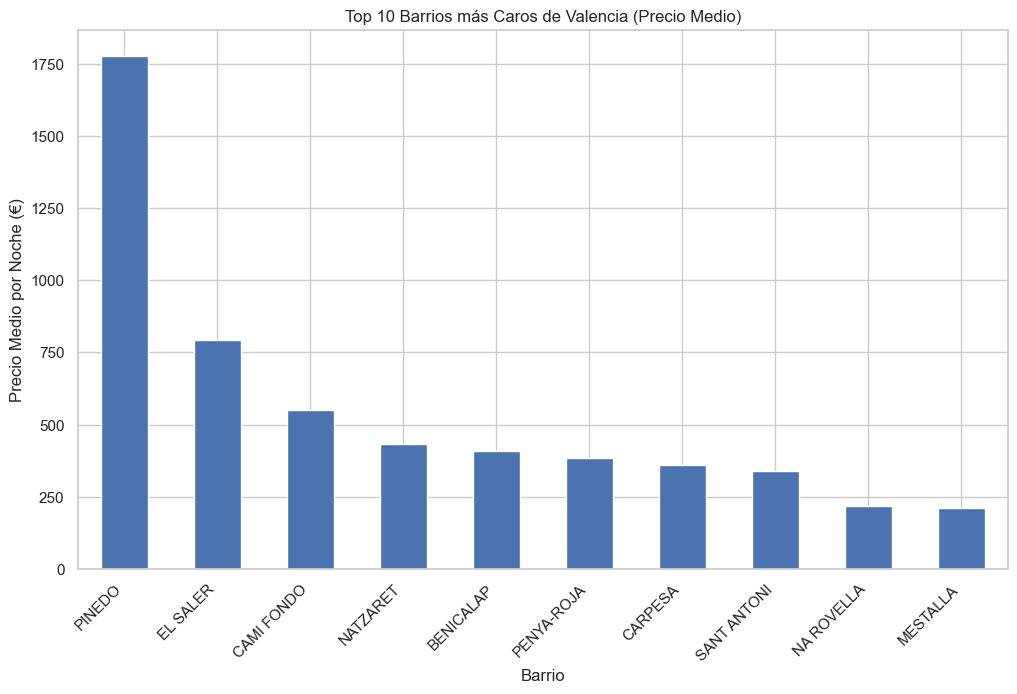

In [5]:
# --- Pregunta 1: ¿Cuál es el barrio (neighbourhood) más caro? ---

# Agrupamos por barrio y calculamos el precio medio
# Usamos .sort_values(ascending=False) para ordenar del más caro al más barato
precio_medio_barrio = df_limpio.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

print("--- Top 10 barrios más caros (de media) ---")
print(precio_medio_barrio.head(10))

# Visualización: Gráfico de barras del Top 10
plt.figure(figsize=(12, 7)) # Damos un tamaño al gráfico (ancho, alto)
precio_medio_barrio.head(10).plot(kind='bar')
plt.title('Top 10 Barrios más Caros de Valencia (Precio Medio)')
plt.ylabel('Precio Medio por Noche (€)')
plt.xlabel('Barrio')
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que se lean mejor
plt.show() # Muestra el gráfico

## ¿ Que tipo de propiedad es más común ver en los Air bnb de Valencia ?


--- Número de alojamientos por tipo ---
room_type
Entire home/apt    5782
Private room       2036
Hotel room           16
Shared room          10
Name: count, dtype: int64


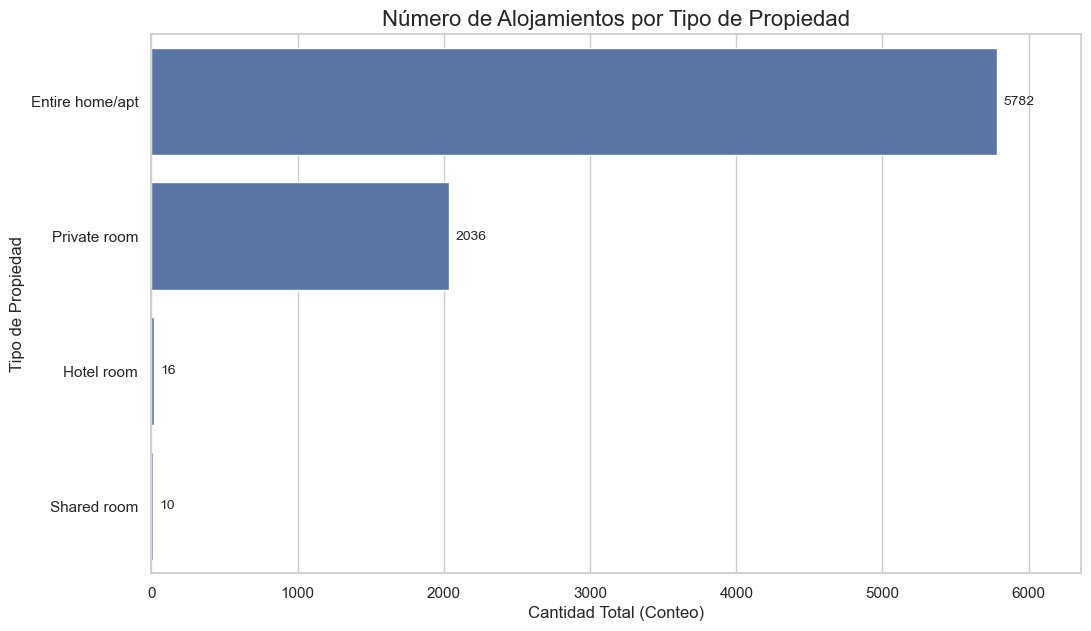

In [6]:

print("\n--- Número de alojamientos por tipo ---")
print(df_limpio['room_type'].value_counts())

# 1. Creamos el gráfico 
plt.figure(figsize=(12, 7)) # Hacemos el gráfico un poco más ancho
ax = sns.countplot(
    data=df_limpio,
    y='room_type',
    order=df_limpio['room_type'].value_counts().index
)

# Etiquetas de conteo al final de cada barra
ax.bar_label(ax.containers[0], padding=5, fmt='%d', fontsize=10)

# 3.Ajustamos el límite X para asegurarnos de que el texto no se corte.
max_count = df_limpio['room_type'].value_counts().max()
plt.xlim(0, max_count * 1.1) # Damos un 10% de espacio extra a la derecha

# 4. Títulos y etiquetas
plt.title('Número de Alojamientos por Tipo de Propiedad', fontsize=16)
plt.ylabel('Tipo de Propiedad')
plt.xlabel('Cantidad Total (Conteo)')

plt.show()

## ¿Hay relación entre el precio y las reseñas? 



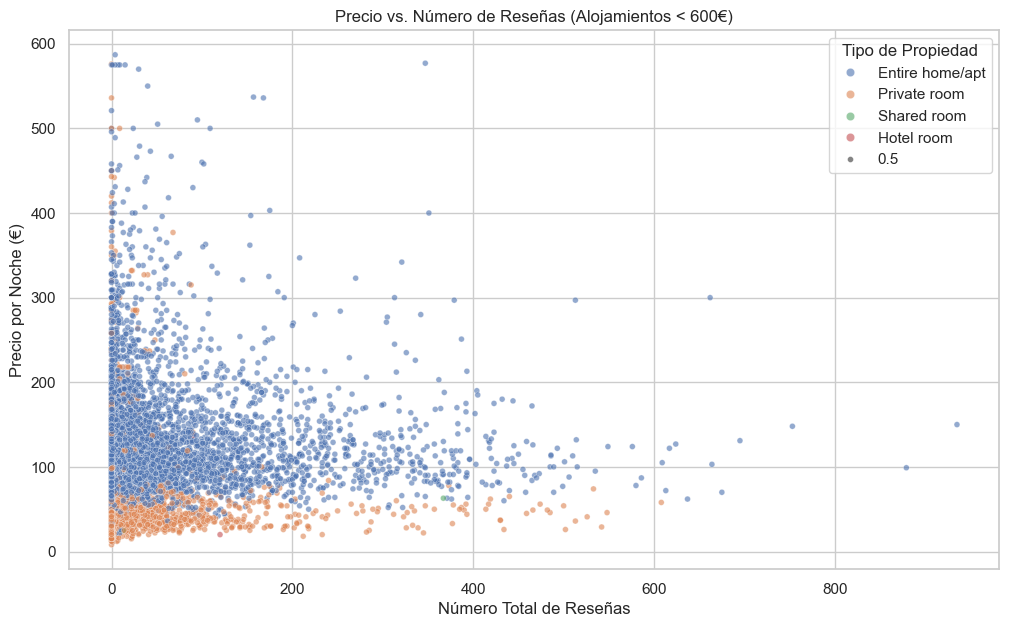

In [7]:
# --- Pregunta 3: ¿Hay relación entre el precio y las reseñas? ---

# Usaremos un gráfico de dispersión (scatterplot)
# A menudo, los precios muy altos (outliers) distorsionan el gráfico.
# Vamos a filtrar para ver mejor la "zona" donde está la mayoría de datos.
df_filtrado = df_limpio[df_limpio['price'] < 600] # Solo alojamientos de menos de 600€

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtrado, 
    x='number_of_reviews', 
    y='price', 
    hue='room_type',  # Damos color por tipo de habitación
    alpha=0.6,        # Hacemos los puntos un poco transparentes
    size=0.5          # Reducimos el tamaño del punto
)
plt.title('Precio vs. Número de Reseñas (Alojamientos < 600€)')
plt.xlabel('Número Total de Reseñas')
plt.ylabel('Precio por Noche (€)')
plt.legend(title='Tipo de Propiedad')
plt.show()